Tratamentos de Dados Churn

In [69]:
import pandas as pd
import seaborn as sbn
import statistics as sts

In [70]:
dataset = pd.read_csv("dados/churn.csv", sep = ";")
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [71]:
dataset.shape

(999, 12)

In [72]:
dataset.columns = ["Id", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "TemCartaoCredito", "Ativo", "Salario", "Saiu"]
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [73]:
dataset.isnull().sum()
# TODO: resolver NULOS Genero e Salario

Id                  0
Score               0
Estado              0
Genero              8
Idade               0
Patrimonio          0
Saldo               0
Produtos            0
TemCartaoCredito    0
Ativo               0
Salario             7
Saiu                0
dtype: int64

In [74]:
# Resolvendo NULOS Genero
dataset['Genero'].fillna('Masculino', inplace = True)
dataset['Genero'].isnull().sum()

0

In [75]:
# Resolvendo NULOS Salario
mediana = sts.median(dataset['Salario'])
dataset['Salario'].fillna(mediana, inplace = True)
dataset['Salario'].isnull().sum()

0

In [76]:
dataset[dataset.duplicated(['Id'], keep = False)]
# TODO: resolver dados duplicados

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [77]:
# Resolvendo dados duplicados
dataset.drop_duplicates(subset = 'Id', keep = 'first', inplace = True)
dataset[dataset.duplicated(['Id'], keep = False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu


<AxesSubplot:xlabel='Genero'>

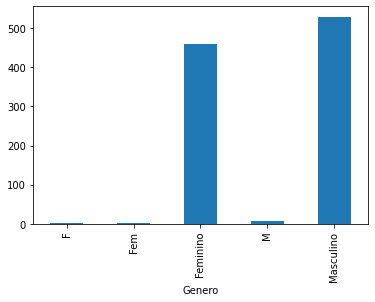

In [78]:
agrupado = dataset.groupby(['Genero']).size()
agrupado.plot.bar()
# TODO: resolver dados Genero

<AxesSubplot:xlabel='Genero'>

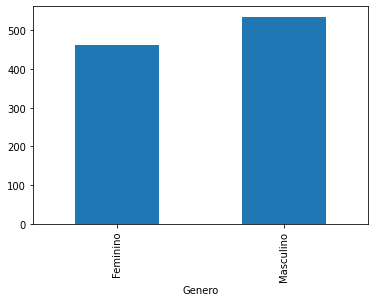

In [79]:
# Resolvendo dados Genero
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'
dataset.loc[dataset['Genero'].isin(['Fem', 'F']), 'Genero'] = 'Feminino'
agrupado = dataset.groupby(['Genero']).size()
agrupado.plot.bar()

<AxesSubplot:xlabel='Estado'>

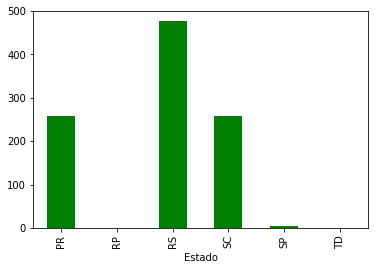

In [80]:
agrupado = dataset.groupby(['Estado']).size()
agrupado.plot.bar(color = 'green')
# TODO: resolver dados Estado

<AxesSubplot:xlabel='Estado'>

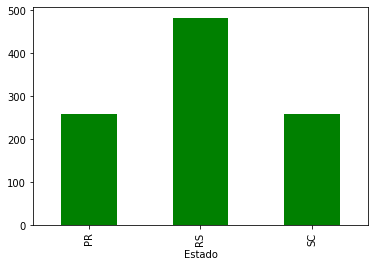

In [81]:
# Resolvendo dados Estado
dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD']), 'Estado'] = 'RS'
agrupado = dataset.groupby(['Estado']).size()
agrupado.plot.bar(color = 'green')

In [82]:
dataset['Score'].describe()

count    998.000000
mean     648.605210
std       98.312117
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

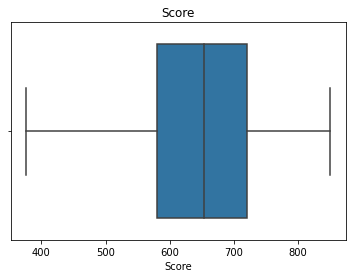

In [83]:
sbn.boxplot(x = dataset['Score']).set_title('Score')

Text(0.5, 1.0, 'Score')

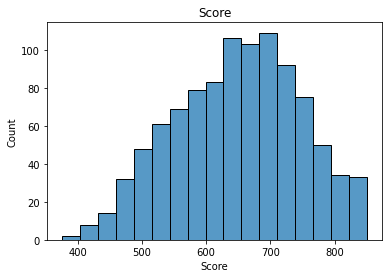

In [84]:
sbn.histplot(x = dataset['Score']).set_title('Score')

In [85]:
dataset['Idade'].describe()

count    998.000000
mean      38.907816
std       11.406570
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

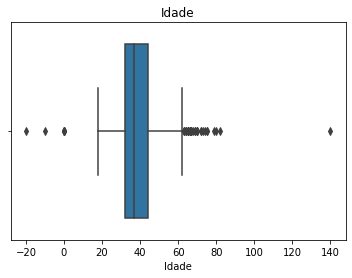

In [86]:
sbn.boxplot(x = dataset['Idade']).set_title('Idade')
# TODO: resolver dados Idade

In [87]:
# Resolvendo dados Idade
mediana = sts.median(dataset['Idade'])
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 100), 'Idade'] = mediana
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 100)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu


In [88]:
dataset['Saldo'].describe()

count    9.980000e+02
mean     7.162423e+06
std      6.314508e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.926348e+06
75%      1.258767e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

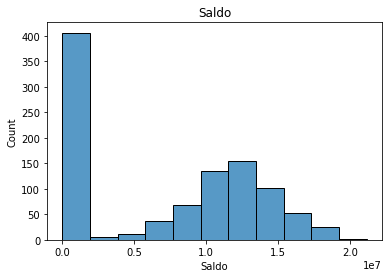

In [89]:
sbn.histplot(x = dataset['Saldo']).set_title('Saldo')

In [90]:
dataset['Salario'].describe()

count    9.980000e+02
mean     3.505879e+07
std      5.289889e+08
min      9.677000e+03
25%      2.849010e+06
50%      8.637196e+06
75%      1.401381e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

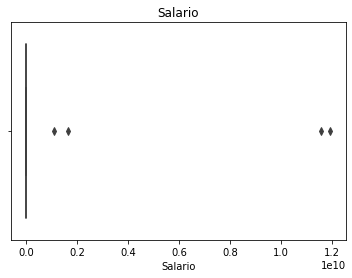

In [91]:
sbn.boxplot(x = dataset['Salario']).set_title('Salario')
# TODO: resolver dados Salario

Text(0.5, 1.0, 'Salario')

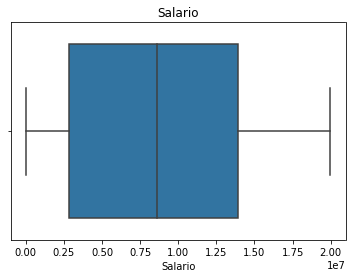

In [92]:
# Resolvendo dados Salario
desvio = sts.stdev(dataset['Salario'])
mediana = sts.median(dataset['Salario'])
dataset.loc[dataset['Salario'] >= 2 * desvio, 'Salario'] = mediana
sbn.boxplot(x = dataset['Salario']).set_title('Salario')

In [93]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
